# Lab | Predicting Claim Amount with ML Linear Regression

## import libraries + Data

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

## import data


In [2]:
!ls

Lab_Predicting_Claim_Amount_ML_Day6_Simon.ipynb
df_carinsurance_cleaned.csv


In [3]:
data=pd.read_csv('df_carinsurance_cleaned.csv')

In [4]:
data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,Feb
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,Jan
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,Feb
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,Jan
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,Jan


### Check the basics with describe, info head 

In [5]:
data.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330
std,6885.081434,30359.195670,34.442532,9.783520,27.940675,0.885589,2.399359,292.180556
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527
50%,5771.147235,33813.500000,83.000000,15.000000,48.000000,0.000000,2.000000,382.564630
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.384256,4.000000,547.200000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   state                          10279 non-null  object 
 2   customer_lifetime_value        10910 non-null  float64
 3   response                       10279 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective_to_date              10910 non-null  object 
 7   employmentstatus               10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  int64  
 10  location_code                  10910 non-null  object 
 11  marital_status                 10910 non-null  object 
 12  monthly_premium_auto           10910 non-null 

### drop unnesessary columns

In [7]:
data.drop(['vehicle_type', 'month','customer'], axis = 1, inplace = True) 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          10279 non-null  object 
 1   customer_lifetime_value        10910 non-null  float64
 2   response                       10279 non-null  object 
 3   coverage                       10910 non-null  object 
 4   education                      10910 non-null  object 
 5   effective_to_date              10910 non-null  object 
 6   employmentstatus               10910 non-null  object 
 7   gender                         10910 non-null  object 
 8   income                         10910 non-null  int64  
 9   location_code                  10910 non-null  object 
 10  marital_status                 10910 non-null  object 
 11  monthly_premium_auto           10910 non-null  int64  
 12  months_since_last_claim        10910 non-null 

### drop nulls 

In [9]:
data=data.dropna()

In [10]:
data.reset_index(drop=True, inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9688 entries, 0 to 9687
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          9688 non-null   object 
 1   customer_lifetime_value        9688 non-null   float64
 2   response                       9688 non-null   object 
 3   coverage                       9688 non-null   object 
 4   education                      9688 non-null   object 
 5   effective_to_date              9688 non-null   object 
 6   employmentstatus               9688 non-null   object 
 7   gender                         9688 non-null   object 
 8   income                         9688 non-null   int64  
 9   location_code                  9688 non-null   object 
 10  marital_status                 9688 non-null   object 
 11  monthly_premium_auto           9688 non-null   int64  
 12  months_since_last_claim        9688 non-null   f

## multicollinearity using a correlation matrix.

### Look at potential multicollinearity using a correlation matrix.

In [12]:
import matplotlib.pyplot as plt 

In [13]:
import seaborn as sns 

In [14]:
#create a correlation matrix of numerical columns
#without any unique info like ids

corr_data = data
correlations_matrix = corr_data.corr()
correlations_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024607,0.398279,0.011239,0.011374,-0.035487,0.021151,0.225460
income,0.024607,1.000000,-0.018288,-0.025976,0.002829,0.006227,-0.011980,-0.358791
monthly_premium_auto,0.398279,-0.018288,1.000000,0.004890,0.016636,-0.012744,-0.012722,0.630740
months_since_last_claim,0.011239,-0.025976,0.004890,1.000000,-0.041690,0.005354,0.008872,0.007338
months_since_policy_inception,0.011374,0.002829,0.016636,-0.041690,1.000000,-0.001124,-0.015192,-0.001465
number_of_open_complaints,-0.035487,0.006227,-0.012744,0.005354,-0.001124,1.000000,0.001451,-0.013775
number_of_policies,0.021151,-0.011980,-0.012722,0.008872,-0.015192,0.001451,1.000000,-0.004575
total_claim_amount,0.225460,-0.358791,0.630740,0.007338,-0.001465,-0.013775,-0.004575,1.000000


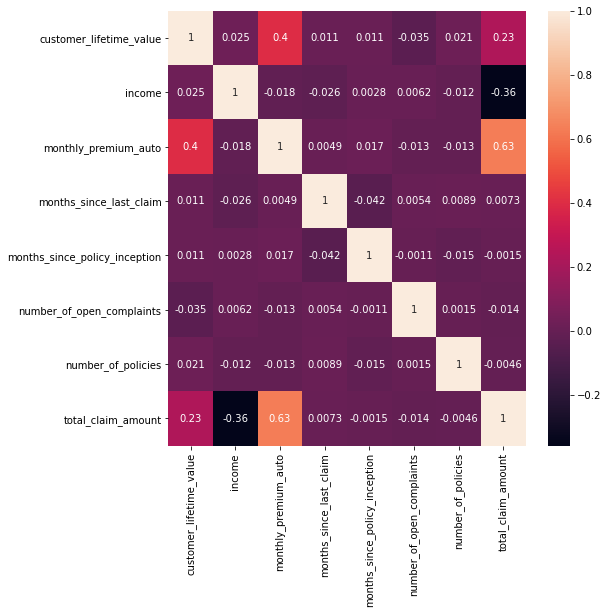

In [15]:
#create a heatmap to visually interrogate the relationships 

plt.figure(figsize=(8,8))
sns.heatmap(correlations_matrix, annot=True);

### Drop low correlations
- 'months_since_last_claim'
- 'months_since_policy_inception'
- 'number_of_open_complaints'
-  'number_of_policies'

In [16]:
data.drop(['months_since_last_claim', 'months_since_policy_inception','number_of_open_complaints','number_of_policies'], axis = 1, inplace = True) 

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9688 entries, 0 to 9687
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   state                    9688 non-null   object 
 1   customer_lifetime_value  9688 non-null   float64
 2   response                 9688 non-null   object 
 3   coverage                 9688 non-null   object 
 4   education                9688 non-null   object 
 5   effective_to_date        9688 non-null   object 
 6   employmentstatus         9688 non-null   object 
 7   gender                   9688 non-null   object 
 8   income                   9688 non-null   int64  
 9   location_code            9688 non-null   object 
 10  marital_status           9688 non-null   object 
 11  monthly_premium_auto     9688 non-null   int64  
 12  policy_type              9688 non-null   object 
 13  policy                   9688 non-null   object 
 14  renew_offer_type        

## Some EDA and a clean outliers step

In [18]:
import numpy as np 

# isolate numeric features 
dfnum=data.select_dtypes(include=np.number)

In [19]:
dfcat=data.select_dtypes(include=object)

In [20]:
dfnum.head(3)

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,4809.216960,48029,61,292.800000
1,2228.525238,0,64,744.924331
2,14947.917300,22139,100,480.000000


In [21]:
# drop columns
# dfnum.drop(['controln', 'tcode'], axis = 1, inplace = True) 

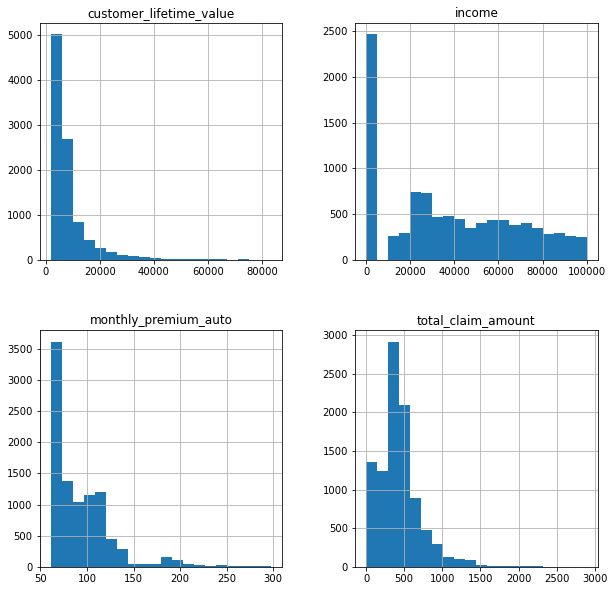

In [22]:
dfnum.hist(bins=20, figsize=(10, 10));

Explore visually both sets of features, to identify next steps.

Look at potential multicollinearity using a correlation matrix or other approach.

<AxesSubplot:>

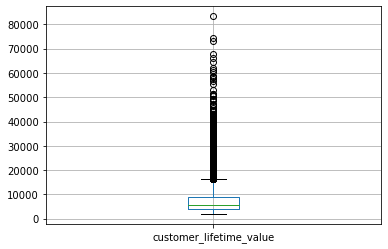

In [23]:
dfnum[['customer_lifetime_value']].boxplot()

<AxesSubplot:>

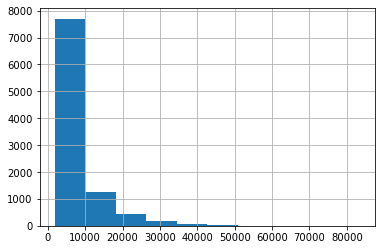

In [24]:
dfnum['customer_lifetime_value'].hist()

### get the inter quartile range 

In [25]:
## use percentiles to drop outliers 
iqr=np.percentile(dfnum['customer_lifetime_value'],75)-np.percentile(dfnum['customer_lifetime_value'],25)

In [26]:
iqr

4970.761068250002

### get the upper and lower limits

 + this is based on 1st and 3rd quartiles (25th and 75th percentiles)
+ with an addition of 1.5 x IQR 

In [27]:
upper_limit= np.percentile(dfnum['customer_lifetime_value'],75)+ 1.5*iqr

In [28]:
upper_limit

16440.824281375004

In [29]:
lower_limit= np.percentile(dfnum['customer_lifetime_value'],25)- 1.5*iqr

In [30]:
lower_limit

-3442.219991625003

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9688 entries, 0 to 9687
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   state                    9688 non-null   object 
 1   customer_lifetime_value  9688 non-null   float64
 2   response                 9688 non-null   object 
 3   coverage                 9688 non-null   object 
 4   education                9688 non-null   object 
 5   effective_to_date        9688 non-null   object 
 6   employmentstatus         9688 non-null   object 
 7   gender                   9688 non-null   object 
 8   income                   9688 non-null   int64  
 9   location_code            9688 non-null   object 
 10  marital_status           9688 non-null   object 
 11  monthly_premium_auto     9688 non-null   int64  
 12  policy_type              9688 non-null   object 
 13  policy                   9688 non-null   object 
 14  renew_offer_type        

In [32]:
data.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,Married,117,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize


### drop data outside of these limits 

In [33]:
## if youre making a DROP change - call the whole data set 
data=data[(data['customer_lifetime_value']>lower_limit)&(data['customer_lifetime_value']<=upper_limit)]

In [34]:
data.reset_index(drop=True, inplace=True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8830 entries, 0 to 8829
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   state                    8830 non-null   object 
 1   customer_lifetime_value  8830 non-null   float64
 2   response                 8830 non-null   object 
 3   coverage                 8830 non-null   object 
 4   education                8830 non-null   object 
 5   effective_to_date        8830 non-null   object 
 6   employmentstatus         8830 non-null   object 
 7   gender                   8830 non-null   object 
 8   income                   8830 non-null   int64  
 9   location_code            8830 non-null   object 
 10  marital_status           8830 non-null   object 
 11  monthly_premium_auto     8830 non-null   int64  
 12  policy_type              8830 non-null   object 
 13  policy                   8830 non-null   object 
 14  renew_offer_type        

### check the distribution shape again 

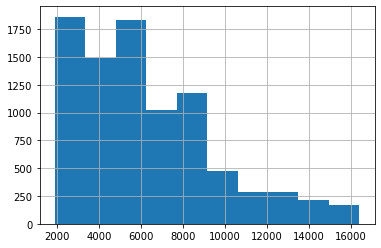

In [36]:
data['customer_lifetime_value'].hist();

### repeat data drop
+ 'monthly_premium_auto' 
+ 'total_claim_amount' 
+ 'income'

In [37]:
iqr=np.percentile(dfnum['income'],75)-np.percentile(dfnum['income'],25)
upper_limit= np.percentile(dfnum['income'],75)+ 1.5*iqr
lower_limit= np.percentile(dfnum['income'],25)- 1.5*iqr
data=data[(data['income']>lower_limit)&(data['income']<=upper_limit)]

In [38]:
iqr=np.percentile(dfnum['monthly_premium_auto'],75)-np.percentile(dfnum['monthly_premium_auto'],25)
upper_limit= np.percentile(dfnum['monthly_premium_auto'],75)+ 1.5*iqr
lower_limit= np.percentile(dfnum['monthly_premium_auto'],25)- 1.5*iqr
data=data[(data['monthly_premium_auto']>lower_limit)&(data['monthly_premium_auto']<=upper_limit)]

In [39]:
iqr=np.percentile(dfnum['total_claim_amount'],75)-np.percentile(dfnum['total_claim_amount'],25)
upper_limit= np.percentile(dfnum['total_claim_amount'],75)+ 1.5*iqr
lower_limit= np.percentile(dfnum['total_claim_amount'],25)- 1.5*iqr
data=data[(data['total_claim_amount']>lower_limit)&(data['total_claim_amount']<=upper_limit)]
data.reset_index(drop=True, inplace=True)

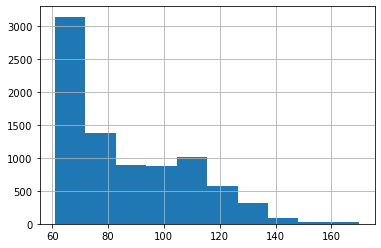

In [40]:
data['monthly_premium_auto'].hist();

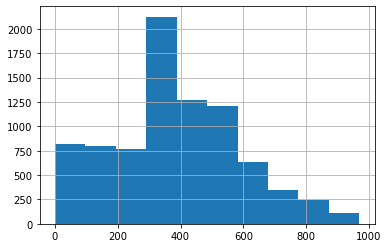

In [41]:
data['total_claim_amount'].hist();

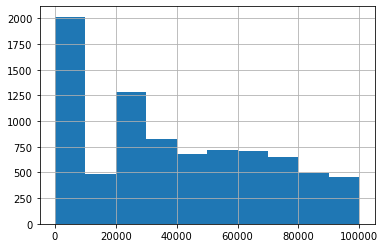

In [42]:
data['income'].hist();

### MinMax scaler on 'effective_to_date'

In [43]:
import time
from datetime import date
from pandas.plotting import scatter_matrix

In [44]:
data['effective_to_date']=pd.to_datetime(data['effective_to_date'],errors='coerce')

In [45]:
from sklearn.preprocessing import MinMaxScaler
transformer=MinMaxScaler().fit(data[['effective_to_date']])
X_MinMax=transformer.transform(data[['effective_to_date']])

In [46]:
date_minmax=pd.DataFrame(X_MinMax, columns=['effective_to_date'])

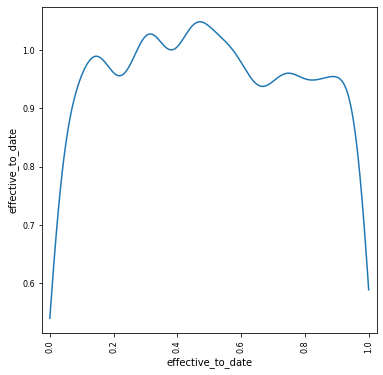

In [47]:
scatter_matrix(date_minmax, alpha=0.2, figsize=(6,6), diagonal='kde');

<Figure size 576x576 with 0 Axes>

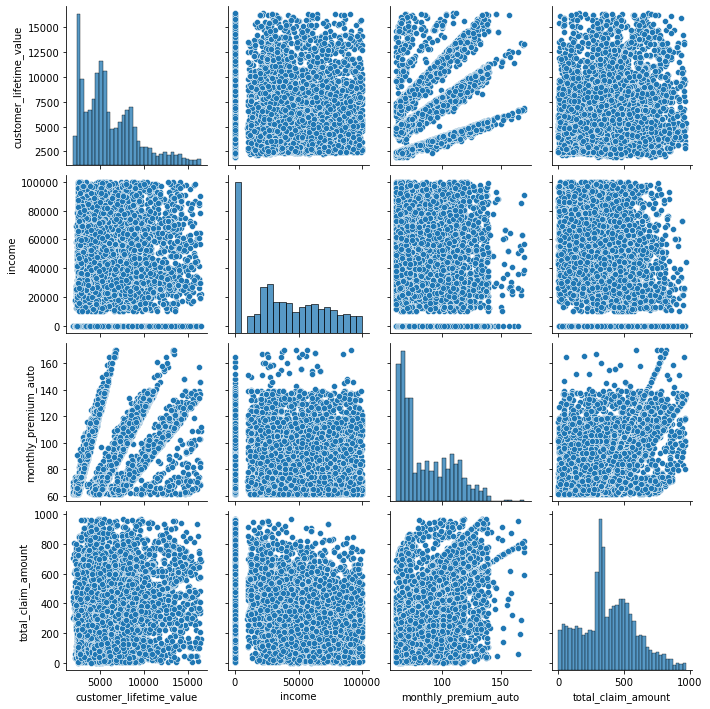

In [48]:
plt.figure(figsize=(8,8));
sns.pairplot(data);

## identify AND isolate target var

In [49]:
y = data['total_claim_amount']

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8322 entries, 0 to 8321
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   state                    8322 non-null   object        
 1   customer_lifetime_value  8322 non-null   float64       
 2   response                 8322 non-null   object        
 3   coverage                 8322 non-null   object        
 4   education                8322 non-null   object        
 5   effective_to_date        8322 non-null   datetime64[ns]
 6   employmentstatus         8322 non-null   object        
 7   gender                   8322 non-null   object        
 8   income                   8322 non-null   int64         
 9   location_code            8322 non-null   object        
 10  marital_status           8322 non-null   object        
 11  monthly_premium_auto     8322 non-null   int64         
 12  policy_type              8322 non-

## split again into num and cat 

In [51]:
data=data.drop(['total_claim_amount'], axis = 1) 

In [52]:
datanum=data.select_dtypes(include=np.number)

In [53]:
datacat=data.select_dtypes(include=object)

## Scale numeric variables, encode categoricals

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(datanum)
StandardScaler()
scaled=scaler.transform(datanum)

In [55]:
scaleddf=pd.DataFrame(scaled)
scaleddf

,0,1,2
0,-0.412833,0.320194,-1.143193
1,-1.239187,-1.263217,-1.007118
2,2.833646,-0.533343,0.625785
3,0.937110,-0.482704,1.396878
4,-0.340524,-0.030056,-1.052477
...,...,...,...
8317,-0.496511,-0.157773,1.351519
8318,-0.806749,-0.330096,0.217559
8319,-1.065271,0.710071,-0.553534
8320,-0.268667,0.752632,-0.961760


In [56]:
#ohe 
datacat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8322 entries, 0 to 8321
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   state             8322 non-null   object
 1   response          8322 non-null   object
 2   coverage          8322 non-null   object
 3   education         8322 non-null   object
 4   employmentstatus  8322 non-null   object
 5   gender            8322 non-null   object
 6   location_code     8322 non-null   object
 7   marital_status    8322 non-null   object
 8   policy_type       8322 non-null   object
 9   policy            8322 non-null   object
 10  renew_offer_type  8322 non-null   object
 11  sales_channel     8322 non-null   object
 12  vehicle_class     8322 non-null   object
 13  vehicle_size      8322 non-null   object
dtypes: object(14)
memory usage: 910.3+ KB


In [57]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error').fit(datacat)
ohe = encoder.transform(datacat).toarray()

In [58]:
ohedf=pd.DataFrame(ohe)
ohedf

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8317,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8318,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8319,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8320,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## join the data back together

In [59]:
newdata=pd.concat([ohedf,scaleddf],axis=1)
newdata.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,0,1,2
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.412833,0.320194,-1.143193
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.239187,-1.263217,-1.007118
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.833646,-0.533343,0.625785
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.937110,-0.482704,1.396878
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.340524,-0.030056,-1.052477


## bring in and apply model 

### train test split 

In [60]:
# train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(newdata,y, test_size=0.4, random_state=40)

In [61]:
X_train.shape

(4993, 58)

In [62]:
y_train.shape

(4993,)

In [63]:
X_test.shape

(3329, 58)

In [64]:
y_test.shape

(3329,)

### model

In [65]:
# get the model and the metrics 
from sklearn import linear_model 
from sklearn.metrics import r2_score, mean_squared_error 

In [66]:
# candidate one model 
lm=linear_model.LinearRegression()

In [67]:
#set up model and train it 
model=lm.fit(X_train,y_train)
#get the predictions on X test 
predictions=lm.predict(X_test)

In [68]:
predictions

array([5.5475e+02, 3.1375e+01, 1.2500e-01, ..., 5.0675e+02, 4.6025e+02,
       1.0625e+01])

In [69]:
#evaluate how good our predictions are 
r2_score(y_test,predictions)
# this is how much of the variation the model explains

0.7772269767540677

In [70]:
mean_squared_error(y_test,predictions)
#this is how accurate we can be in monetary terms 

9314.33928127417

## Reporting Summary

+ I am able to predict claim amount of +/- 9,314.34 USD
+ @ 77.7% prediction rate

## Aditional cleaning possibilities?
- replace 0 income with a mean variable? # run a forloop replacing 0 with mean.
